# Split bill - Vision (OCR + calculation)

Under this scenario, a bill in analyzed and the total is split between 3 people.

In [3]:
# Added so that I can refer to common in the parent folder
from pathlib import Path
import sys
path = str(Path(Path('.').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

# Import the common module
import common
import os
from PIL import Image
import requests
from io import BytesIO

In [4]:
# Get a configured model
client = common.get_openai_client(
        api_key=common.api_KEY,
        api_version=common.api_version,
        azure_endpoint=common.api_URI)

In [5]:
def call_openai(url:str,prompt:str,max_tokens=1000,temperature=0.2):
    response = client.chat.completions.create(
            model=common.gpt_api_deployment,
            messages=[
                {
                "role": "system",
                "content": "You are a helpful assistant that can help provide a compute recommendation based on the provided information. Use only the provided information."
                },
                {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {
                    "type": "image_url",
                    "image_url": {
                        "url": url,
                        "detail": "high"
                    },
                    },
                ],
                }
            ],
            max_tokens=max_tokens,
            temperature=temperature
        )
    return str(response.choices[0].message.content)

In [6]:
def get_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((img.width//2, img.height//2))
    return img


In [7]:
url = "https://alemoraoaist.z13.web.core.windows.net/images/bill-for-ocr.png"


In [8]:
def full_process(url, question):
    print("Image:")
    get_image(url).show()
    print("User:")
    common.split_sentence(question)
    print("\nAssistant:")
    ans = call_openai(url,question)
    common.split_sentence(ans)

Image:


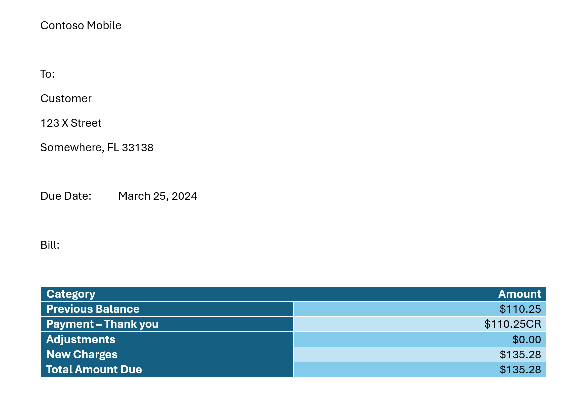

User:
Describe what is in the image.

Assistant:
The image shows a bill statement from Contoso Mobile. The bill is addressed to a customer living at 123 X Street,
Somewhere, FL 33138. The due date for the bill is March 25, 2024. The bill details are presented in a table with two
columns: Category and Amount. The categories and amounts listed are as follows: - Previous Balance: $110.25 - Payment –
Thank you: $110.25CR (CR likely indicates a credit) - Adjustments: $0.00 - New Charges: $135.28 - Total Amount Due:
$135.28 The table has a blue header and alternating blue and white rows for each category.


In [9]:
question = "Describe what is in the image."
full_process(url, question)

Image:


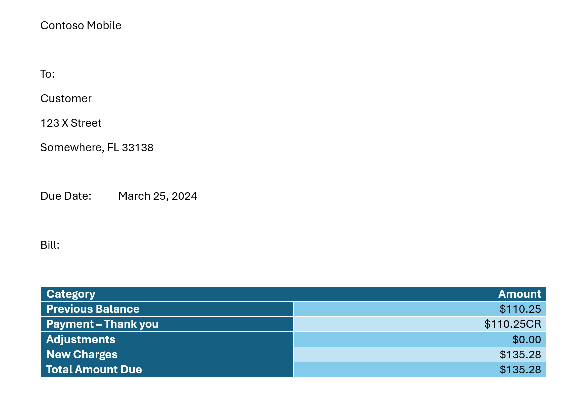

User:
Get a list of the charges. Output in CSV format and the category and amount columns. What is the total amount? Divide
the amount by 3 people. What is each one's share?

Assistant:
```csv Category,Amount Previous Balance,110.25 Payment – Thank you,-110.25 Adjustments,0.00 New Charges,135.28 Total
Amount Due,135.28 ``` The total amount due is $135.28. Divided by 3 people, each one's share is: $135.28 / 3 = $45.09
(rounded to two decimal places)


In [9]:
question = """Get a list of the charges. 

Output in CSV format and the category and amount columns.

What is the total amount? Divide the amount by 3 people. What is each one's share?

"""
full_process(url, question)